In [1]:
from datetime import datetime, timedelta
import time
from netdata_pandas.data import get_data
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np
from numpy import dot
from numpy.linalg import norm
from scipy.stats import ks_2samp

In [2]:
# inputs
hosts = ['london.my-netdata.io']
charts_regex = 'system.*'
before = 0
after = -60*15

In [3]:
# get the data
df = get_data(hosts=hosts, charts_regex=charts_regex, after=after, before=before, index_as_datetime=True)
print(df.shape)
df.head()

(900, 72)


,system.active_processes|active,system.cpu|guest,system.cpu|guest_nice,system.cpu|iowait,system.cpu|irq,system.cpu|nice,system.cpu|softirq,system.cpu|steal,system.cpu|system,system.cpu|user,...,system.softirqs|RCU,system.softirqs|SCHED,system.softirqs|TASKLET,system.softirqs|TIMER,system.softnet_stat|dropped,system.softnet_stat|flow_limit_count,system.softnet_stat|processed,system.softnet_stat|received_rps,system.softnet_stat|squeezed,system.uptime|uptime
time_idx,,,,,,,,,,,,,,,,,,,,,
2020-12-29 18:05:18,210.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.485148,1.485148,0.742574,...,119.79962,95.10288,19.880860,142.27361,0.0,0.0,55.93455,0.0,0.0,68401120.0
2020-12-29 18:05:19,210.0,0.0,0.0,0.0,0.0,0.0,0.246914,2.469136,0.987654,0.987654,...,115.03480,101.97879,19.744850,148.15732,0.0,0.0,58.54447,0.0,0.0,68401120.0
2020-12-29 18:05:20,210.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.741294,1.243781,0.746269,...,106.37875,83.95303,14.626624,129.64009,0.0,0.0,43.92575,0.0,0.0,68401120.0
2020-12-29 18:05:21,210.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.970443,1.231527,0.985222,...,113.41543,92.80761,17.050340,133.77244,0.0,0.0,46.75304,0.0,0.0,68401130.0
2020-12-29 18:05:22,210.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.231527,1.477833,1.231527,...,106.29958,97.05750,27.324030,130.25641,0.0,0.0,74.95644,0.0,0.0,68401130.0


system.ram|buffers
0.001122334455667789
[891]
1
system.ram|free
0.002244668911335578
[380, 891]
2
0.0


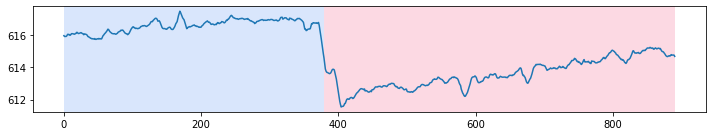

system.load|load5
0.0022497187851518562
[650, 889]
2
0.04789
system.interrupts|IWI
0.001122334455667789
[891]
1
system.load|load1
0.0022497187851518562
[650, 889]
2
0.011955


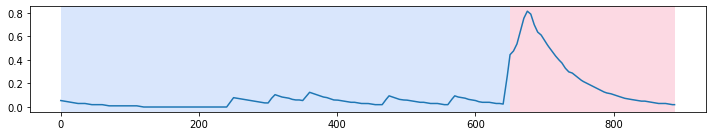

system.ip|sent
0.002244668911335578
[150, 891]
2
1.4999999999999999e-05


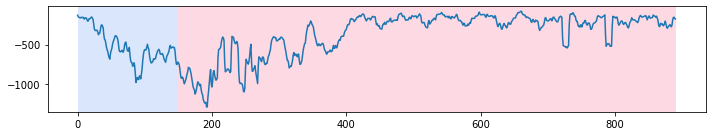

system.interrupts|floppy_6
0.001122334455667789
[891]
1
system.softirqs|SCHED
0.002244668911335578
[400, 891]
2
5e-06


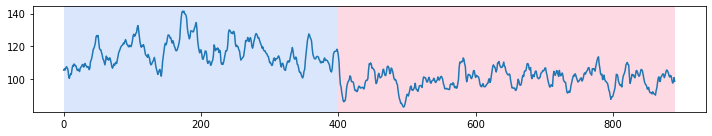

system.idlejitter|min
0.002244668911335578
[705, 891]
2
0.14826
system.idlejitter|average
0.002244668911335578
[410, 891]
2
0.094665
system.softirqs|NET_RX
0.002244668911335578
[285, 891]
2
0.0026349999999999998


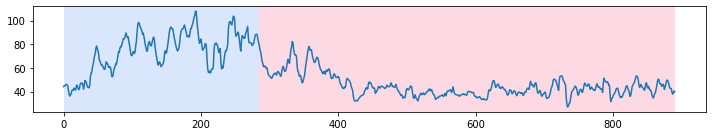

system.io|in
0.001122334455667789
[891]
1
system.io|out
0.002244668911335578
[425, 891]
2
0.08966000000000002
system.processes|blocked
0.002244668911335578
[55, 891]
2
0.8900750000000001
system.softnet_stat|received_rps
0.001122334455667789
[891]
1
system.interrupts|virtio0-input.0_25
0.002244668911335578
[285, 891]
2
0.0036700000000000005


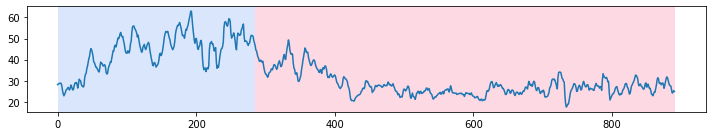

system.softirqs|RCU
0.002244668911335578
[540, 891]
2
0.015375000000000003


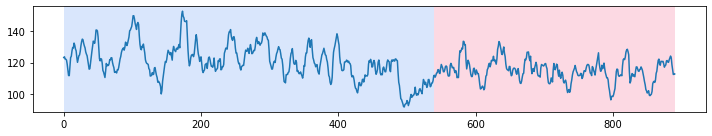

system.softnet_stat|flow_limit_count
0.001122334455667789
[891]
1
system.processes|running
0.002244668911335578
[220, 891]
2
0.033030000000000004
system.shared_memory_segments|segments
0.001122334455667789
[891]
1
system.intr|interrupts
0.002244668911335578
[80, 891]
2
0.008805


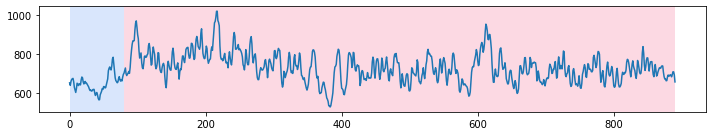

system.interrupts|MCP
0.002244668911335578
[530, 891]
2
0.45
system.interrupts|virtio3-req.0_34
0.001122334455667789
[891]
1
system.cpu|guest
0.001122334455667789
[891]
1
system.ip|received
0.002244668911335578
[50, 891]
2
0.06753
system.cpu|softirq
0.002244668911335578
[415, 891]
2
0.036985000000000004
system.interrupts|serial_4
0.001122334455667789
[891]
1
system.cpu|system
0.002244668911335578
[405, 891]
2
0.03405
system.cpu|iowait
0.002244668911335578
[175, 891]
2
0.35813
system.interrupts|LOC
0.002244668911335578
[170, 891]
2
0.06183000000000001
system.softirqs|HI
0.001122334455667789
[891]
1
system.uptime|uptime
0.001122334455667789
[891]
1
system.pgpgio|in
0.001122334455667789
[891]
1
system.load|load15
0.0022497187851518562
[655, 889]
2
0.0


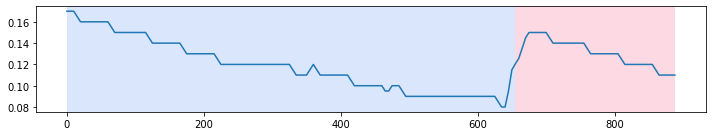

system.interrupts|i8042_12
0.001122334455667789
[891]
1
system.net|sent
0.002244668911335578
[150, 891]
2
0.0235
system.interrupts|i8042_1
0.001122334455667789
[891]
1
system.softnet_stat|squeezed
0.002244668911335578
[115, 891]
2
0.817295
system.cpu|guest_nice
0.001122334455667789
[891]
1
system.cpu|nice
0.001122334455667789
[891]
1
system.ipv6|received
0.002244668911335578
[320, 891]
2
0.09399499999999998
system.interrupts|virtio0-output.0_26
0.001122334455667789
[891]
1
system.interrupts|timer_0
0.001122334455667789
[891]
1
system.interrupts|RES
0.002244668911335578
[410, 891]
2
0.050925
system.cpu|user
0.002244668911335578
[210, 891]
2
0.09056499999999999
system.pgpgio|out
0.002244668911335578
[425, 891]
2
0.09162000000000001
system.softirqs|TIMER
0.002244668911335578
[405, 891]
2
0.00173


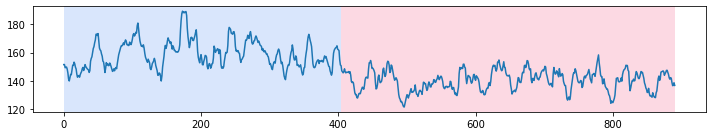

system.cpu|steal
0.002244668911335578
[410, 891]
2
0.013640000000000003


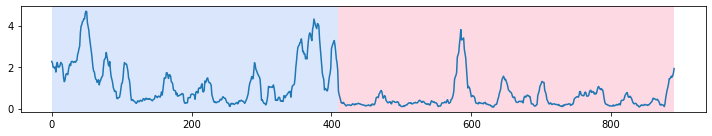

system.softirqs|NET_TX
0.002244668911335578
[150, 891]
2
0.038725
system.cpu|irq
0.001122334455667789
[891]
1


In [4]:
# select some cols
X = df[np.random.choice(df.columns, 50, replace=False)]

# add some smoothing
X = X.rolling(10).mean()

for col in X.columns:

    print(col)

    x = X[col].dropna().values
    
    algo = rpt.Window(width=100, model='l2').fit(x)
    bkps = algo.predict(n_bkps=1)
    bkps_n = len(bkps)

    print(len(bkps)/len(x))
    print(bkps)
    print(bkps_n)

    if bkps_n > 1:

        x_bkps = x[bkps[0]:bkps[1]]
        x_pre_bkps = x[0:bkps[0]]

        bkps_len = len(x_bkps)
    
        metrics = []
        samp_len = 30

        for _ in range(20):

            samp_start_pre = np.random.choice(range(len(x_pre_bkps)-samp_len))
            x_samp_pre = x_pre_bkps[samp_start_pre:samp_start_pre+samp_len]

            samp_start = np.random.choice(range(len(x_bkps)-samp_len))
            x_samp = x_bkps[samp_start:samp_start+samp_len]

            _, p = ks_2samp(x_samp, x_samp_pre)

            #cos_sim = dot(x_samp, x_samp_pre)/(norm(x_samp)*norm(x_samp_pre))
            #metric = abs(np.mean(x_samp) - np.mean(x_samp_pre))            
            #metrics.append(round(s,4))
            metrics.append(round(p,4))
            #metrics.append(cos_sim)
            #metrics.append(metric)

        quality_score = np.mean(metrics)
        print(quality_score)

        if quality_score <= 0.02:
            rpt.display(x, bkps)
            plt.show()